In [15]:
# Scrapes the site WorldoMeters for coronavirus data and dumps it into a dataframe
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

In [3]:
# Scrape the US page to obtain all the states in the US
url = 'https://www.worldometers.info/coronavirus/country/us/'

In [4]:
# Check responses to ensure they are 200
response = requests.get(url)
response

<Response [200]>

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>United States Coronavirus: 30,365,111 Cases and 552,556 Deaths - Worldometer</title>\n<meta name="description" content="United States Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline.">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n<link rel="apple
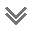

In [13]:
html_source = response.text
html_source

In [5]:
# Uses the "re" library to parse the page, find the tags and convert them to uppercase using a lambda function. 
html_source = re.sub(r'<.*?>', lambda g: g.group(0).upper(), html_source)

In [6]:
soup = BeautifulSoup(html_source, 'html.parser')

In [10]:
state_tables = pd.read_html(html_source)

In [11]:
# Export the results as a Dataframe
state_tables[0]

,#,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Source,Projections
0,NaN,USA Total,30365111,"+6,231",552556.0,86.0,22524111.0,7288444.0,91737.0,1669.0,385732183.0,1165345.0,NaN,NaN,NaN
1,1.0,California,3635598,NaN,56824.0,NaN,1914453.0,1664321.0,92012.0,1438.0,51601716.0,1305968.0,39512223.0,[view by county] [1],[projections]
2,2.0,Texas,2749440,NaN,47257.0,NaN,2590824.0,111359.0,94822.0,1630.0,24507017.0,845190.0,28995881.0,[view by county] [1] [2] [3],[projections]
3,3.0,Florida,1994117,NaN,32613.0,NaN,1329665.0,631839.0,92846.0,1518.0,24357867.0,1134098.0,21477737.0,[view by county] [1] [2] [3],[projections]
4,4.0,New York,1811288,NaN,49539.0,NaN,932935.0,828814.0,93108.0,2547.0,42015555.0,2159787.0,19453561.0,[view by county] [1] [2] [3],[projections]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60.0,Navajo Nation,29987,NaN,1228.0,NaN,16289.0,12470.0,NaN,NaN,250472.0,NaN,NaN,[1] [2] [3],NaN
61,61.0,Grand Princess Ship,122,NaN,7.0,NaN,115.0,0.0,NaN,NaN,NaN,NaN,NaN,[1],NaN
62,62.0,Wuhan Repatriated,3,NaN,NaN,NaN,3.0,0.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
63,63.0,Diamond Princess Ship,46,NaN,NaN,NaN,46.0,0.0,NaN,NaN,46.0,NaN,NaN,NaN,NaN


In [19]:
# Write the results to a csv file
state_tables[0].to_csv('coronavirus_states_raw.csv', index=False)